<a href="https://colab.research.google.com/github/YASH2512BANSAL/YOUTUBE_COMMENT_ANALYSIS/blob/main/youtube_comment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
# Essentials
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [ ]:
data = pd.read_csv('/content/comments.csv')
data.columns
data1=data.drop(['Unnamed: 0','Likes','Time','user','UserLink'],axis=1)
data1

,Comment
0,Love how Dr. Fate's design looks and how cool ...
1,I can’t get over how good everything looks. Dr...
2,Really hoping that this can save DC's movie un...
3,U cant deny how good this looks.Now if they ca...
4,"From this trailer, I have a feeling that this ..."
...,...
275,I want to see this. It may be one of his most ...
276,wow thats very amazing. I can't wait to see.
277,Doctor Fate is why i'm watching
278,This looks fire. DC looks like they stepping t...


**Data labelling**

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["Comment"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["Comment"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["Comment"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["Comment"]]
score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1["Sentiment"] = sentiment
data1.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Comment,Positive,Negative,Neutral,Compound,Sentiment
0,Love how Dr. Fate's design looks and how cool ...,0.384,0.000,0.616,0.8910,Positive
1,I can’t get over how good everything looks. Dr...,0.153,0.000,0.847,0.6801,Positive
2,Really hoping that this can save DC's movie un...,0.375,0.000,0.625,0.9216,Positive
3,U cant deny how good this looks.Now if they ca...,0.302,0.049,0.649,0.9262,Positive
4,"From this trailer, I have a feeling that this ...",0.131,0.000,0.869,0.4416,Positive


**Finaldata**

In [ ]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,Comment,Sentiment
0,Love how Dr. Fate's design looks and how cool ...,Positive
1,I can’t get over how good everything looks. Dr...,Positive
2,Really hoping that this can save DC's movie un...,Positive
3,U cant deny how good this looks.Now if they ca...,Positive
4,"From this trailer, I have a feeling that this ...",Positive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

In [ ]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data_copy = data2.copy()
data_copy.Comment = data_copy.Comment.apply(lambda text: text_processing(text))

In [ ]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [ ]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,love dr fate design look cool scene look power...,2
1,get good everything look dr fate magic cyclone...,2
2,really hoping save dc movie universe looking n...,2
3,u cant deny good looksnow follow rest movie go...,2
4,trailer feeling movie going one movie would ne...,2


In [ ]:
processed_data['Sentiment'].value_counts()

2    205
1     39
0     36
Name: Sentiment, dtype: int64

In [ ]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [ ]:
final_data['Sentiment'].value_counts()

0    205
1    205
2    205
Name: Sentiment, dtype: int64

In [ ]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['trailer look sick im definitely watching movie',
 'actually look like villain trailer',
 'movie going push dc top comic book movie disaster early dceu new msheu mess two awesome projekts behind suicide squad peacemaker yeah going rock pun kinda intended',
 'damn sure im gon na watchdc seems going right track',
 'okay look absolutely incredible dc making look foolish ever even skeptical film definitely seeing opening weekend']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

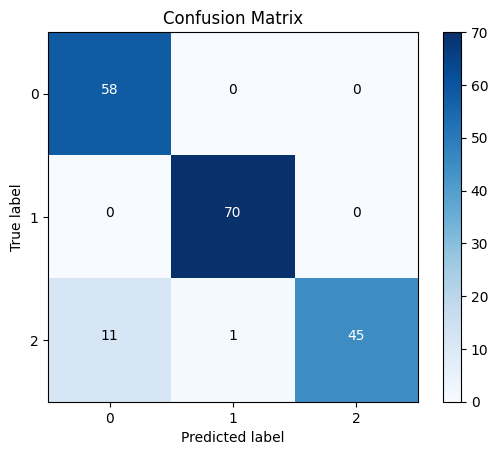

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Add text annotations to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()








In [ ]:
nb_score = accuracy_score(y_test, y_pred)
nb_score

0.9351351351351351